# Artificial Intelligence for Robotics 01

## General Information:
Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.

If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.

When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via Kernel  to  Restart & Run All).

Code cells where you are supposed to give your answer often include the line `raise NotImplementedError`. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.

## Submission:
Please submit your notebook via the web interface (in the main view  to  Assignments  to  Submit). The assignments are **due on Monday at 20:00**.

## Group Work:
Please enter your UID (your username here) and those of your group partners into the next cell. We apply plagiarism checking, so do not submit others solutions! If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.

## Questions about the Assignment:
If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions!

### Please add the usernames of all your team members in the manner member1, member2 in next cell (example given below)

member1 = 'example'

member2 = 'example2'

#### If you are not working in a group, then please add member2 as none2s

In [878]:
# YOUR CODE HERE
member1 = 'aamrit2s'
member2 = 'rbale2s'
member3 = 'none2s'
member4 = 'none2s'

In [879]:
# Execute this cell to make sure you correctly filled in the usernames of the team members

def group_name_test():
    for member_id in [member1, member2]:
        assert isinstance(member_id, str), "Please give your member id as a string."
        assert len(member_id) > 0, "You need to fill in the member id for both members"
        assert member_id.endswith("2s"), "The member id should end with 2s (Your JupyterHub username)"

group_name_test() 
print("All tests passed!")

All tests passed!


# Task 1

**[130 Point(s)]**

# Social Robot Navigation and Seating Arrangement

## Background
You are working with a social robot in a home environment that needs to help coordinate a dinner gathering. The robot must help guide guests to their seats at the dining table while respecting social constraints and optimizing its path. The home layout is provided with furniture, walls, and initial positions of people marked.

## Scenario
A dinner party is being hosted where 8 guests (P1-P8) are dispersed throughout the house. The robot needs to:
1. Determine a valid seating arrangement at the dining table based on social constraints
2. Plan paths to guide each guest to their assigned seat

### Note
__You are not limited to using the provided libraries or function skeletons. Feel free to use any other tools or methods that you believe are better suited for implementing this solution. The only requirement is to use the randomly generated house layout provided with the assignment. Your solution must be built using this specific house layout.__


## Task 1.1

**[10 Point(s)]**

### Task1: Read the Home layout (10 points)

The task is to develop a pathfinding solution for a robot operating on a grid. The robot of the **dimension(2x2)** must guide several people of the **dimension(1x1)** to their destinations, minimizing the overall cost. The grid's configuration - **obstacles, location of people, furniture placement** is dynamic and changes per execution but the **number of rooms** remain same. The annotations for identifying obstacles and people remains the same throughtout all runs. This grid layout will be available in a file produced by the given function. 

**You need to implement a function capable of reading and parsing this file.**

For the purpose of visualisation the home layout is also visible as a plot below.


#### Grid Symbol Legend
    - `.` : Empty space/Corridor
    - `W` : Wall
    - `L` : Living Room  
    - `D` : Dining Room
    - `K` : Kitchen
    - `B` : Bedroom
    - `C` : Balcony
    - `d` : Door
    - `r` : Robot
    - `T` : Dining Table
    - `H` : Dining Chair
    - `S` : Sofa
    - `c` : Coffee Table
    - `b` : Bed
    - `A` : Wardrobe
    - `k` : Kitchen Counter
    - `F` : Fridge
    - `G` : Garden Chair
    - `1-N`: Person (where N is the number of people)

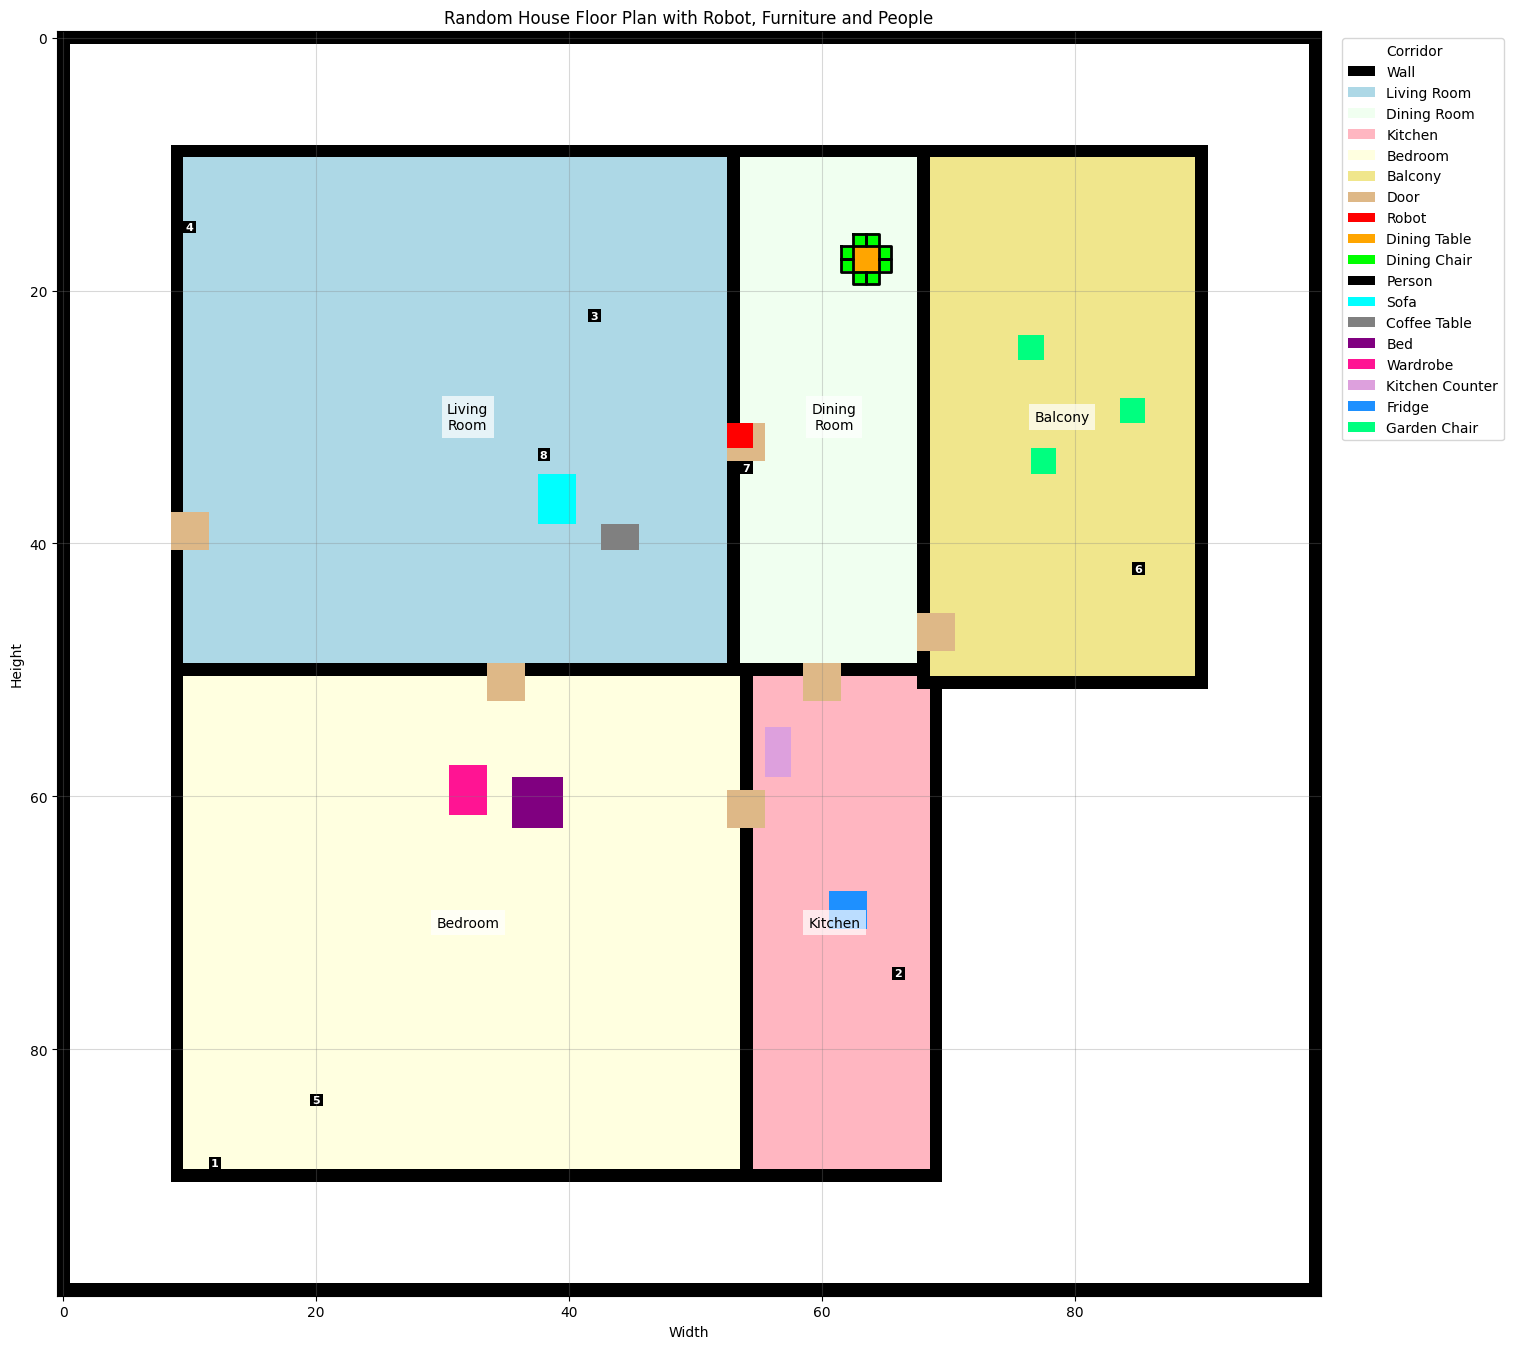

In [880]:
from utils.home_layout import generate_house_layout

grid, rooms = generate_house_layout(file_name = 'home.txt')

In [881]:
import numpy as np

with open('home.txt', 'r') as file:
    for line in file:
        np.append(grid, line.strip().split())

obstacles = np.array(['W', 'T', 'H', 'S', 'c', 'b', 'A', 'k', 'F', 'G', '1', '2', '3', '4', '5', '6', '7', '8'])
print(grid)
rooms

[['W' 'W' 'W' ... 'W' 'W' 'W']
 ['W' '.' '.' ... '.' '.' 'W']
 ['W' '.' '.' ... '.' '.' 'W']
 ...
 ['W' '.' '.' ... '.' '.' 'W']
 ['W' '.' '.' ... '.' '.' 'W']
 ['W' 'W' 'W' ... 'W' 'W' 'W']]


{'L': (slice(10, 51, None), slice(10, 54, None)),
 'D': (slice(10, 51, None), slice(54, 69, None)),
 'K': (slice(51, 90, None), slice(54, 69, None)),
 'B': (slice(51, 90, None), slice(10, 54, None)),
 'C': (slice(10, 51, None), slice(69, 90, None))}

## Task 1.2

**[20 Point(s)]**

## Task 2: Topological Mapping (20 points)

The robot needs to navigate through a large house environment to guide people to their seats. Planning paths directly on this grid is inefficient. Your task is to create a topological graph that represents the house layout at a higher level of abstraction, enabling hierarchical path planning.

#### Why does it matter? 
A topological map reduces the problem by first planning through rooms, then detailed paths.This hierarchical approach significantly reduces the search space and planning time.



To do so, you can utilise [networkx](https://networkx.org/) for creating graphs.
Below is an example showing how to create and visualize a graph with networkx. Feel free to implement your own approach - this is just an illustration and not meant to dictate your solution.


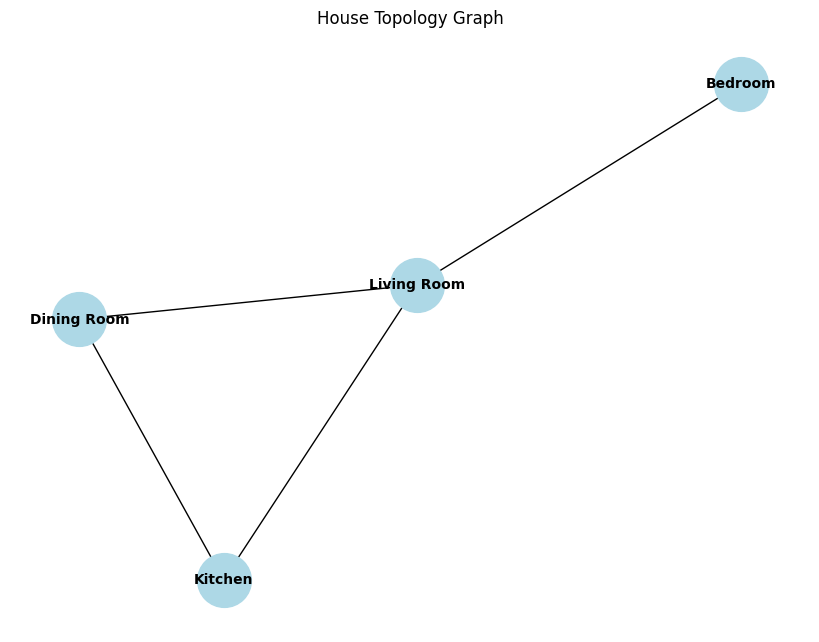

In [882]:
# !pip install networkx
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# Create a new graph
G = nx.Graph()

# Add nodes (rooms)
G.add_node("Living Room")
G.add_node("Kitchen") 
G.add_node("Bedroom")
G.add_node("Dining Room")

# Add edges (doors/connections between rooms)
G.add_edge("Living Room", "Kitchen")
G.add_edge("Living Room", "Dining Room")
G.add_edge("Kitchen", "Dining Room") 
G.add_edge("Living Room", "Bedroom")

# Draw the graph
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=10, font_weight='bold')
plt.title("House Topology Graph")
plt.show()


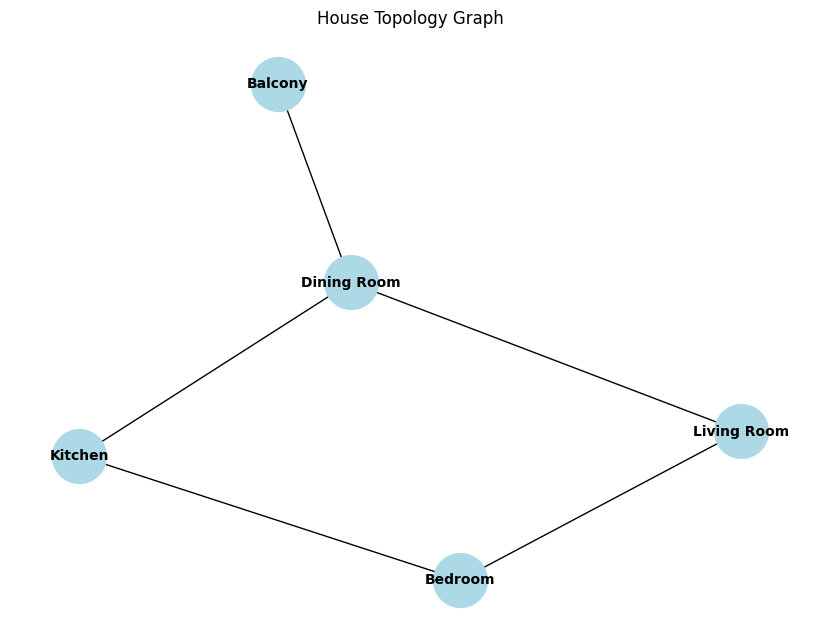

In [883]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Defining the dict for ease of plotting
room_dict = {
    'L': 'Living Room',
    'D': 'Dining Room',
    'K': 'Kitchen',
    'B': 'Bedroom',
    'C': 'Balcony'
}

G = nx.Graph()

# Adding rooms as nodes
for room in rooms:
    G.add_node(room_dict[room])

# Mapping each door to the rooms it touches. Need some way of keeping track of 
# common doors when traversing separate rooms. So Use dict with door location 
# as key and touching rooms as values
door_to_rooms = {}
for room, slc in rooms.items():
    # Getting the room coordinates
    x_start, x_end = slc[0].start, slc[0].stop
    y_start, y_end = slc[1].start, slc[1].stop

    # The slice sometimes contains only room and no walls
    # Check +-1 around the slice to include any potential 'd' cells in the wall
    for x in range(x_start - 1, x_end + 1):
        for y in range(y_start - 1, y_end + 1):
            if grid[x, y] == 'd':
                if (x, y) not in door_to_rooms:
                    door_to_rooms[(x, y)] = []
                door_to_rooms[(x, y)].append(room)

for touching_rooms in door_to_rooms.values():
    # if check Needed because doors are 3x3 and protrude into rooms, so many of the 'd' cells 
    # are captured in the traversal of only the room they protrude into
    if len(touching_rooms) >= 2:
        for i in range(len(touching_rooms)):
            for j in range(i+1, len(touching_rooms)):
                G.add_edge(room_dict[touching_rooms[i]], room_dict[touching_rooms[j]])

# Draw the graph
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=10, font_weight='bold')
plt.title("House Topology Graph")
plt.show()

## Task 1.3

**[30 Point(s)]**

## Task 3: Path Planning (30 points)

The robot needs to guide multiple people to their assigned seats at the dining table. For each person, the robot must:

1. Plan a path from the robot's current position to the person
2. Plan a path from the person to their assigned seat
3. Implement A* search algorithm for path planning
4. Handle obstacles (furniture, walls) and other people as blocked cells

To do so, you need to **implement A\* search with appropriate heuristic function**, make sure to account for walls, furniture and other people as obstacles.

**Calculate and print total path cost for the complete guidance task**.

In [884]:
import numpy as np
import heapq

# Constants
MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Robot avoids all furniture and people
ROBOT_OBSTACLES = {'W', 'T', 'H', 'S', 'c', 'b', 'A', 'k', 'F', 'G'} | set('12345678')

# Person avoids only walls and large furniture (but can step on chairs!)
PERSON_OBSTACLES = {'W', 'T', 'S', 'c', 'b', 'A', 'k', 'F', 'G'}

# Robot can walk on: empty, door, room labels, its own position
WALKABLE = {'.', 'd', 'L', 'D', 'K', 'B', 'C', ' ', 'r'}


def is_valid_robot_pos(grid, x, y):
    h, w = grid.shape
    if x < 0 or y < 0 or x + 1 >= w or y + 1 >= h:
        return False
    for dy in [-1, 1]:
        for dx in [-1, 1]:
            if grid[y + dy][x + dx] in ROBOT_OBSTACLES:
                return False
    return True

def find_robot_position(grid):
    r_positions = [(x, y) for y in range(grid.shape[0]) for x in range(grid.shape[1]) if grid[y][x] == 'r']
    for x, y in r_positions:
        if ((x + 1, y) in r_positions and (x, y + 1) in r_positions and (x + 1, y + 1) in r_positions):
            # print(f"Found 2x2 robot block at top-left: ({x}, {y})")
            return (x, y)
    print("No valid 2x2 'r' block found")
    return (0, 0)

def find_people_and_chairs(grid):
    people = {}
    chairs = []
    for y in range(grid.shape[0]):
        for x in range(grid.shape[1]):
            val = grid[y][x]
            if val in '12345678':
                people[int(val)] = (x, y)
            elif val == 'H':
                chairs.append((x, y))
    # print(f"Found {len(people)} people and {len(chairs)} chairs")
    return people, chairs

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal, is_robot=True):
    obstacles = ROBOT_OBSTACLES if is_robot else PERSON_OBSTACLES
    def is_valid(x, y):
        h, w = grid.shape
        if not (0 <= x < w and 0 <= y < h):
            return False
        return grid[y][x] not in obstacles

    open_set = [(heuristic(start, goal), 0, start)]
    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, cost, current = heapq.heappop(open_set)
        if current == goal:
            return cost

        for dx, dy in MOVES:
            nx, ny = current[0] + dx, current[1] + dy
            if not is_valid(nx, ny):
                continue
            neighbor = (nx, ny)
            tentative = cost + 1
            if neighbor not in g_score or tentative < g_score[neighbor]:
                g_score[neighbor] = tentative
                heapq.heappush(open_set, (tentative + heuristic(neighbor, goal), tentative, neighbor))
                came_from[neighbor] = current

    return None

def find_adjacent_valid_robot_positions(grid, person_pos):
    x, y = person_pos
    adjacent = []
    for dx, dy in MOVES:
        rx, ry = x + dx, y + dy
        if is_valid_robot_pos(grid, rx, ry):
            adjacent.append((rx, ry))
    return adjacent

def assign_chairs_to_people(people, chairs):
    assignments = {}
    sorted_people = sorted(people.items())
    for i, (pid, ppos) in enumerate(sorted_people):
        if i < len(chairs):
            assignments[pid] = chairs[i]
    return assignments

def find_total_cost_with_AStar(assignments = None):
    
    robot_pos = find_robot_position(grid)
    people, chairs = find_people_and_chairs(grid)
    if assignments is None:
        assignments = assign_chairs_to_people(people, chairs)
        # print(assignments)

    total_cost = 0

    for pid in sorted(people):
        person_pos = people[pid]
        chair_pos = assignments.get(pid)

        if not chair_pos:
            print(f"No chair assigned to person {pid}")
            continue

        print(f"\nGuiding person {pid} at {person_pos} to chair at {chair_pos}")

        adj_positions = find_adjacent_valid_robot_positions(grid, person_pos)
        # print("adj_positions: ", adj_positions)
        if not adj_positions:
            print(f"No adjacent valid 2x2 robot position near person {pid}")
            continue

        # Find shortest robot to adjacent
        min_robot_cost = None
        for adj in adj_positions:
            cost = a_star(grid, robot_pos, adj, is_robot=True)
            if cost is not None and (min_robot_cost is None or cost < min_robot_cost):
                min_robot_cost = cost
                robot_goal = adj

        if min_robot_cost is None:
            print(f"No path from robot to person {pid}")
            continue

        person_to_chair = a_star(grid, person_pos, chair_pos, is_robot=False)
        if person_to_chair is None:
            print(f"No path from person {pid} to chair")
            continue

        total = min_robot_cost + person_to_chair
        total_cost += total
        robot_pos = chair_pos  # Robot follows person

        print(f"Guided person {pid}: Robot to Person = {min_robot_cost}, Person to Chair = {person_to_chair}, Total = {total}")

    print(f"\nTotal cost to guide all people: {total_cost}")
    return total_cost

find_total_cost_with_AStar()


Guiding person 1 at (12, 89) to chair at (63, 16)
Guided person 1: Robot to Person = 98, Person to Chair = 124, Total = 222

Guiding person 2 at (66, 74) to chair at (64, 16)
Guided person 2: Robot to Person = 64, Person to Chair = 66, Total = 130

Guiding person 3 at (42, 22) to chair at (62, 17)
Guided person 3: Robot to Person = 47, Person to Chair = 43, Total = 90

Guiding person 4 at (10, 15) to chair at (65, 17)
Guided person 4: Robot to Person = 81, Person to Chair = 85, Total = 166

Guiding person 5 at (20, 84) to chair at (62, 18)
Guided person 5: Robot to Person = 113, Person to Chair = 108, Total = 221

Guiding person 6 at (85, 42) to chair at (65, 18)
Guided person 6: Robot to Person = 54, Person to Chair = 52, Total = 106

Guiding person 7 at (54, 34) to chair at (63, 19)
Guided person 7: Robot to Person = 26, Person to Chair = 24, Total = 50

Guiding person 8 at (38, 33) to chair at (64, 19)
Guided person 8: Robot to Person = 38, Person to Chair = 40, Total = 78

Total c

1063

## Task 1.4

**[40 Point(s)]**

## Task 4: Seating Arrangement Constraint Satisfaction (30 points)

The robot needs to determine valid seating arrangements for 8 people around the dining table while respecting social constraints. Each arrangement must satisfy basic constraints (one person per seat) and specific social preferences of individuals.



### Social Constraints:
1. Language Groups:
   - P1, P2, P3 speak English only
   - P4, P5 speak Spanish only
   - P6, P7, P8 are bilingual
   - At least one bilingual person must sit between language groups
   
2. Conversation Preferences:
   - P1 wants to discuss business with P6 and needs to sit together
   - P3 and P5 are in a heated argument so must be far apart at the table
   - P2 and P8 are close friends so want to sit together
   - P4 and P7 are sharing a presentation so need to sit adjacent


**Implement a constraint satisfaction solver to find valid seating arrangements, please use backtracking search to find all possible valid arrangements.**

In [885]:
# YOUR CODE HERE
#assignment = {} # {Person: Seat}

# function BACKTRACKING-SEARCH(csp) returns a solution or failure
#     return BACKTRACK(csp, { })
# function BACKTRACK(csp, assignment) returns a solution or failure
#     if assignment is complete then return assignment
#     var ← SELECT-UNASSIGNED-VARIABLE(csp, assignment)
#     for each value in ORDER-DOMAIN-VALUES(csp, var, assignment) do
#         if value is consistent with assignment then
#             add {var = value} to assignment
#             inferences ← I NFERENCE(csp, var, assignment)
#             if inferences != failure then
#                 add inferences to csp
#                 result ← BACKTRACK(csp, assignment)
#                 if result != failure then return result
#                 remove inferences from csp
#             remove {var = value} from assignment
#     return failure

def is_complete(csp, assignment):
    return len(assignment) == len(csp["people"])

def adjacent(s1, s2):
    return abs(s1 - s2) == 1 or abs(s1 - s2) == 7  # circular table

def far_apart(s1, s2):
    '''
    By far apart, I assume it to mean that the persons are atleast 2 seats apart.
    It could also be taken to mean that the persons are diametrically opposite, but that is a 
    constraint which gives 0 valid arrangements when taken along with the other social constraints.
    '''
    # Check for adjacency or separation by only one person
    if adjacent(s1, s2) or abs(s1 - s2) == 2 or abs(s1 - s2) == 6:
        return False
    return True

def is_consistent(var, value, assignment):
    if value in assignment.values():  # Ensure one person per seat
        return False
    temp_assign = assignment.copy()
    temp_assign[var] = value
    return all_constraints_satisfied(temp_assign)

def all_constraints_satisfied(assignment):
    if 'P1' in assignment and 'P6' in assignment:
        if not adjacent(assignment['P1'], assignment['P6']):
            return False
        
    if 'P2' in assignment and 'P8' in assignment:
        if not adjacent(assignment['P2'], assignment['P8']):
            return False
    
    if 'P4' in assignment and 'P7' in assignment:
        if not adjacent(assignment['P4'], assignment['P7']):
            return False
        
    if 'P3' in assignment and 'P5' in assignment:
        if not far_apart(assignment['P3'], assignment['P5']):
            return False

    # Language group separation
    english_only = {'P1', 'P2', 'P3'}
    spanish_only = {'P4', 'P5'}
    # bilingual = {'P6', 'P7', 'P8'}
    # num_seats = len(csp["people"])

    for p_en in english_only:
        for p_sp in spanish_only:
            if p_en not in assignment or p_sp not in assignment:
                continue
            if adjacent(assignment[p_en], assignment[p_sp]):
                return False
    return True

def SELECT_UNASSIGNED_VARIABLE(csp, assignment):
    unassigned = [p for p in csp["people"] if p not in assignment]
    return min(unassigned, key=lambda person: len(csp["domains"][person]))

def ORDER_DOMAIN_VALUES(csp, var, assignment):
    return csp["domains"][var]

def INFERENCE(csp, value, assignment):
    inferences = {}
    for p in csp["people"]:
        if p not in assignment and value in csp["domains"][p]:
            # Remove the assigned value from others’ domains (no two people on the same seat)
            csp["domains"][p].remove(value)
            if not csp["domains"][p]:  # Domain wipe-out = failure
                return None
            inferences[p] = value
    return inferences

def BACKTRACK(csp, assignment, solutions):
    if is_complete(csp, assignment):
        if all_constraints_satisfied(assignment):
            solutions.append(assignment.copy())
        return

    var = SELECT_UNASSIGNED_VARIABLE(csp, assignment)
    for value in ORDER_DOMAIN_VALUES(csp, var, assignment):
        if is_consistent(var, value, assignment):
            assignment[var] = value
            # Copy domains before making inferences
            saved_domains = {person: list(csp["domains"][person]) for person in csp["people"]}
            inferences = INFERENCE(csp, value, assignment)

            if inferences is not None:
                BACKTRACK(csp, assignment, solutions)

            # Restore domains and assignment
            csp["domains"] = saved_domains
            del assignment[var]

def backtracking_search_all(csp):
    solutions = []
    BACKTRACK(csp, {}, solutions)
    return solutions

# csp = {
#     "people": ['P1','P2','P3','P4','P5','P6','P7','P8'],
#     "domains": {p: list(range(1, 9)) for p in ['P1','P2','P3','P4','P5','P6','P7','P8']}
# }

# solutions = backtracking_search_all(csp)
# solutions
# print(f"Total valid seating arrangements found: {len(solutions)}\n")
# for i, sol in enumerate(solutions, 1):
#     ordered = sorted(sol.items(), key=lambda x: x[1])
#     seating_order = [f"{p} (Seat {s})" for p, s in ordered]
#     print(f"Arrangement {i}: {seating_order}")

## Task 1.5

**[20 Point(s)]**

## Task 5: Integration (10 points)

The final task is to integrate all the previous components into a complete solution that demonstrates the robot's ability to efficiently guide guests to their seats while respecting both physical constraints of the environment and social seating preferences.

**Implement the following:**
- Apply the seating arrangement solution from the constraint satisfaction solver to find the valid seating arrangement
- Then use the topological map to find the local map for each guest
- Then use the A* search algorithm on the local map to find the path from the robot to each guest and from each guest to their assigned seat
- Show the total cost of the path taken by the robot and display the seating arrangment.

In [886]:
# YOUR CODE HERE
# raise NotImplementedError()
from collections import defaultdict

# robot_pos = find_robot_position(grid)
people, chairs = find_people_and_chairs(grid)
# print("robot_pos : ", robot_pos)
# print("people : ", people)
# print("chairs : ", chairs)
people_list = ["P"+str(p) for p in list(people.keys())]
csp = {
    "people": people_list,
    "domains": {p: list(range(1, 9)) for p in people_list}
}
# print("csp: ", csp)
assignments = backtracking_search_all(csp)
# print("assignments : ", assignments)
# print("Total assignments: ", len(assignments))

# convert_csp_output_to_clockwise_chair_order_for_AStar_args() logic was borrowed from LLM Model (GPT).
def convert_csp_output_to_clockwise_chair_order_for_AStar_args(chairs):
    # Group by Y values (rows)
    by_y = defaultdict(list)
    for x, y in chairs:
        by_y[y].append((x, y))

    # Sort Y coordinates (top to bottom)
    sorted_ys = sorted(by_y)

    # Top and bottom rows
    top_row = sorted(by_y[sorted_ys[0]])           # Top row → left to right
    bottom_row = sorted(by_y[sorted_ys[-1]], reverse=True)  # Bottom row → right to left

    # Middle Y rows for left and right columns
    left_side = []
    right_side = []

    for y in sorted_ys[1:-1]:
        row = sorted(by_y[y])
        if row:
            left_side.append(row[0])               # leftmost chair
            if len(row) > 1:
                right_side.append(row[-1])         # rightmost chair

    right_side = right_side  # top to bottom for clockwise
    left_side = left_side[::-1]  # bottom to top for clockwise

    # Combine in clockwise order
    clockwise_chairs = top_row + right_side + bottom_row + left_side
    return clockwise_chairs

converted_chairs = convert_csp_output_to_clockwise_chair_order_for_AStar_args(chairs)
choosen_assignment = assignments[1]
new_assignment = {
    int(person[1:]): converted_chairs[seat_num - 1] if seat_num <= len(converted_chairs) else None
    for person, seat_num in choosen_assignment.items()
}

find_total_cost_with_AStar(new_assignment)
# print(new_assignment)

### Printing logic ##

coord_to_person = {v: k for k, v in new_assignment.items()}

# Get coordinate bounds
xs = [x for x, y in coord_to_person]
ys = [y for x, y in coord_to_person]
min_x, max_x = min(xs), max(xs)
min_y, max_y = min(ys), max(ys)

# Print grid
for y in range(min_y, max_y + 1):
    row = ""
    for x in range(min_x, max_x + 1):
        person = coord_to_person.get((x, y), "  ")  # Empty if no person
        row += f"{str(person).rjust(2)} "
    print(row)


Guiding person 1 at (12, 89) to chair at (63, 19)
Guided person 1: Robot to Person = 98, Person to Chair = 121, Total = 219

Guiding person 2 at (66, 74) to chair at (65, 18)
Guided person 2: Robot to Person = 61, Person to Chair = 65, Total = 126

Guiding person 3 at (42, 22) to chair at (65, 17)
Guided person 3: Robot to Person = 44, Person to Chair = 46, Total = 90

Guiding person 4 at (10, 15) to chair at (63, 16)
Guided person 4: Robot to Person = 86, Person to Chair = 84, Total = 170

Guiding person 5 at (20, 84) to chair at (62, 17)
Guided person 5: Robot to Person = 110, Person to Chair = 109, Total = 219

Guiding person 6 at (85, 42) to chair at (62, 18)
Guided person 6: Robot to Person = 57, Person to Chair = 55, Total = 112

Guiding person 7 at (54, 34) to chair at (64, 16)
Guided person 7: Robot to Person = 23, Person to Chair = 28, Total = 51

Guiding person 8 at (38, 33) to chair at (64, 19)
Guided person 8: Robot to Person = 44, Person to Chair = 40, Total = 84

Total c

## Task 1.6

**[10 Point(s)]**

## Task 6: Visualisation: Optional (10 points)

Let's visualise the path for each person using the provided animation code. Ensure that the path format matches the requirements of the function. You can either use the given animation code or create your own visualization to demonstrate the robot's path.

In [889]:
from utils.robot_path_vis import animate_robot_movement
from IPython.display import HTML

def demonstrate_robot_guidance(grid, rooms,path):
    """
    Demonstrates robot guidance by creating an animation of the robot's path.

    Args:
        grid: 2D array representing the house layout.
        rooms: Dictionary containing room areas.
        path: List of (x, y) tuples

    The path should be a list of (x, y) tuples representing the coordinates
    the robot will follow. The path should start at the robot's initial position,
    include the position of the person to guide, and end at the destination.

    """
    
    # Placeholder for A* algorithm call to generate path
    
    # YOUR CODE HERE
    # raise NotImplementedError()
    
    # Create animation
    anim = animate_robot_movement(grid, rooms, path, person_following=True)
    return anim

# Run demonstration

anim = demonstrate_robot_guidance(grid, rooms)
HTML(anim.to_jshtml())



TypeError: demonstrate_robot_guidance() missing 1 required positional argument: 'path'